In [1]:
# Auto-reload modules on change
%load_ext autoreload
%autoreload 2

In [2]:
import os
import random
import supervision as sv
from PIL import Image
from pathlib import Path
from utils.io import read_json

In [3]:
# DATA
RANDOM_SEED = 42
PREP_DATA_DIR = Path("../data/VNL_500Videos_RFDETR")

# MODEL
CHECKPOINT = "../finetune/RFDETRBase/checkpoint_best_total.pth"

In [4]:
annotations = read_json("../data/VNL_500Videos_RFDETR/test/_annotations.coco.json")
object_classes = {val["id"]: val["name"] for val in annotations["categories"]}

In [5]:
from rfdetr import RFDETRBase
model = RFDETRBase(pretrain_weights=CHECKPOINT)
# model.optimize_for_inference()

Loading pretrain weights


Model is not optimized for inference. Latency may be higher than expected. You can optimize the model for inference by calling model.optimize_for_inference().


/home/hoang/code/Jump-Player-Joint-Detection/data/VNL_500Videos_RFDETR/test/fra_jpn_men_vnl_2023_1080p_rally_000189_000041.jpg


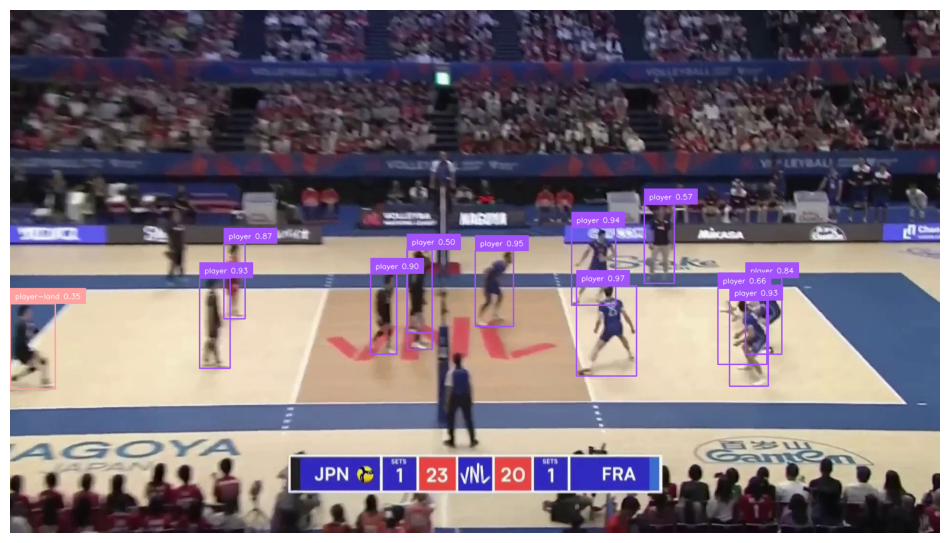

In [6]:
image_path = os.path.abspath(PREP_DATA_DIR / "test" / random.choice(annotations["images"])["file_name"])
image = Image.open(image_path)
detections = model.predict(image, threshold=0.25)

labels = [
    f"{object_classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections, labels)

print(image_path)
sv.plot_image(annotated_image)

In [1]:
# Show some frames that have Jump &/ Land

while True:
    image_path = os.path.abspath(PREP_DATA_DIR / "test" / random.choice(annotations["images"])["file_name"])
    image = Image.open(image_path)
    # detections = model.predict(image, threshold=0.25)
    detections = model.predict(image_path, threshold=0.25)
    
    if any(_cls != 0 for _cls in detections.class_id):
        break


labels = [
    f"{object_classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections, labels)

print(image_path)
sv.plot_image(annotated_image)

NameError: name 'os' is not defined